In [68]:
#@formatter:off
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR

%matplotlib inline
# sns.set_theme(style='whitegrid')
plt.style.use('default')
#@formatter:on

<u>Any SVM needs scaling!</u>
# Classification
**Separates data by line using as width margin as possible**<br>
## Linear

In [69]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    # high values of C makes margin narrower and border crossing less frequent (hard margin)
    # much faster then SVC(kernel='linear')
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

## Non linear

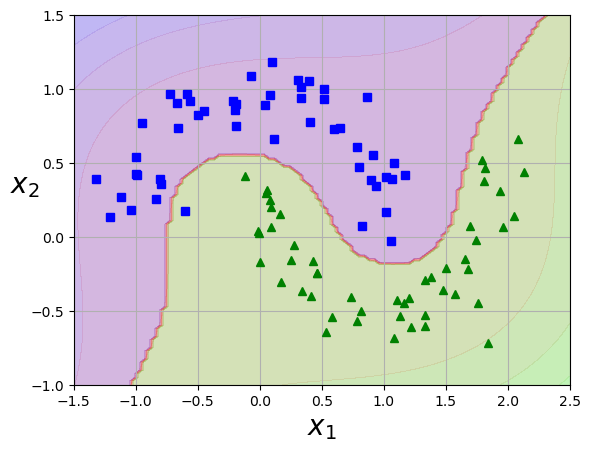

In [70]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


def plot_predictions(clf, axes):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X).reshape(x1.shape)
    # The decision function tells us on which side of the hyperplane generated by the classifier we are
    # (and how far we are away from it).
    y_decision = clf.decision_function(X).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x1, x2, y_decision, cmap=plt.cm.brg, alpha=0.1)


poly_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=10, loss='hinge'))
])

X, y = datasets.make_moons(n_samples=100, noise=0.15, random_state=228)
poly_svm_clf.fit(X, y)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])

### Kernel tricks

#### Polynomial

In [71]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    # coef0 controls the degree of high-extent polynomial influence in comparison with low-extent
    ('poly_svc', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_svc', SVC(C=5, coef0=1, kernel='poly'))])

#### Gaussian RBF kernel

In [72]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    # gamma manages bell width: new feature influence (makes borders sharper)
    ('rbf_svc', SVC(kernel='rbf', gamma=5, coef0=1, C=5))
])

# Regression
**Tries to fit as much data into margin as possible**

In [ ]:
# epsilon increases margin width
svm_reg = LinearSVR(epsilon=1.5)

# high values of C corresponds to low regularization degree
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
